In [1]:
# 1.A-

import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\user\Downloads\signal-data.csv")
print (df.head())

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

In [2]:
# 1.B-

print(df.describe())

                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.0000

In [3]:
# OBSERVATION-

# The count values show the number of non-null entries for each feature.Some features have missing values as indicated by the difference in counts.

# We have mean close to zero with small deviation which indicates, others may have larger mean and standard deviation values.This 
# indicates the need for feature scaling before applying certain machine learning algorithms.

# The target variable 'Pass/Fail' indicate that the majority class (pass) is represented by the value -1, while the minority class
# (fail) is represented by the value 1.This suggests an imbalanced dataset, which may require special handling techniques during 
# model training to avoid bias towards the majority class.

In [4]:
# 2.A-

threshold = len(df) * 0.2

for column in df.columns:
    null_count = df[column].isnull().sum()
    
    if df[column].dtype != 'object':
       
        if null_count >= threshold:
            df.drop(column, axis=1, inplace=True)
            print(f"Column '{column}' removed due to 20% or more null values.")
        else:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Null values in column '{column}' imputed with mean value {mean_value:.2f}.")

print("\nDataFrame after removing features with 20%+ null values and imputing rest with mean:")
print(df.head())

Null values in column '0' imputed with mean value 3014.45.
Null values in column '1' imputed with mean value 2495.85.
Null values in column '2' imputed with mean value 2200.55.
Null values in column '3' imputed with mean value 1396.38.
Null values in column '4' imputed with mean value 4.20.
Null values in column '5' imputed with mean value 100.00.
Null values in column '6' imputed with mean value 101.11.
Null values in column '7' imputed with mean value 0.12.
Null values in column '8' imputed with mean value 1.46.
Null values in column '9' imputed with mean value -0.00.
Null values in column '10' imputed with mean value 0.00.
Null values in column '11' imputed with mean value 0.96.
Null values in column '12' imputed with mean value 199.96.
Null values in column '13' imputed with mean value 0.00.
Null values in column '14' imputed with mean value 9.01.
Null values in column '15' imputed with mean value 413.09.
Null values in column '16' imputed with mean value 9.91.
Null values in colum

In [5]:
# 2.B-

features_to_drop = []
for column in df.columns:
    if df[column].nunique() == 1:
        features_to_drop.append(column)

df.drop(features_to_drop, axis=1, inplace=True)

print("DataFrame after dropping features with the same value for all rows:")
print(df.head())


DataFrame after dropping features with the same value for all rows:
                  Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9  ...      577     582     583     584  \
0   97.6133  0.1242  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045   

       585       586    

In [6]:
# 2.C-

zero_std_features = df.std()[df.std() == 0].index
df.drop(zero_std_features, axis=1, inplace=True)
print(f"Dropped {len(zero_std_features)} features with zero standard deviation.")

correlation_matrix = df.corr()

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

df.drop(highly_correlated_features, axis=1, inplace=True)
print(f"Dropped {len(highly_correlated_features)} highly correlated features.")

print("\nDataFrame after dropping features based on zero standard deviation and high correlation:")
print(df.head())

Dropped 0 features with zero standard deviation.


C:\Users\user\AppData\Local\Temp\ipykernel_6156\2399546339.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zero_std_features = df.std()[df.std() == 0].index
C:\Users\user\AppData\Local\Temp\ipykernel_6156\2399546339.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zero_std_features = df.std()[df.std() == 0].index
C:\Users\user\AppData\Local\Temp\ipykernel_6156\2399546339.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid colu

Dropped 221 highly correlated features.

DataFrame after dropping features based on zero standard deviation and high correlation:
                  Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9  ...       570     571    572     573  \
0   97.6133  0.1242  1.5005  0.0162  ...  533.8500  2.1113   8.95  0.3157   
1  102.3433  0.1247  1.4966 -0.0005  ...  535.0164  2.4335   5.92  0.2653   
2   95.4878  0.1241  1.4436  0.0041  ...  535.0245  2.0293  11.21  0.1882   
3  104.2367  0.1217  1.4882 -0.0124  ...  530.5682  2.0253   9.33  0.1738   
4  100.3967  0.1235  1.5031 -0.0031  ...

In [7]:
# justification-

# No features were dropped based on zero standard deviation.This indicates that all features in the dataset have variability in
# their values, meaning they provide unique information.

# 221 highly correlated features were dropped.Highly correlated features often provide redundant information, which can lead to
# overfitting and computational inefficiency.This will help in improving the model's interpretability, reducing overfitting,
# and enhancing its predictive performance on unseen data.

In [8]:
# 2.D-

from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_features = df.drop(['Time', 'Pass/Fail'], axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]

high_vif_features = vif_data[vif_data["VIF"] > 10]
print("Features with high VIF:")
print(high_vif_features)

if not high_vif_features.empty:
    df.drop(high_vif_features["Feature"], axis=1, inplace=True)
    print(f"\nDropped {len(high_vif_features)} features with high VIF.")
else:
    print("\nNo features with high VIF.")


Features with high VIF:
    Feature           VIF
0         0   2203.071439
1         1   1202.378257
2         2   8902.250288
3         3     32.265039
5         6    743.497991
..      ...           ...
210     564     11.162818
212     570   1282.583952
213     571    102.548103
215     573     11.119681
216     582  27956.234441

[138 rows x 2 columns]

Dropped 138 features with high VIF.


In [9]:
# 2.E-

# MODIFICATIONS=

# Handling Missing Values (2.a)
# Removing Features with 20%+ Null Values and Imputing Rest with Mean (2.b)
# Dropping Features with the Same Value for All Rows (2.c)
# Dropping Features Based on Zero Standard Deviation and High Correlation (2.d)


# ASSUMPTIONS=

# Dimensionality Reduction: While some feature selection and removal steps have been taken, there may still be a large number
# of features in the dataset. Principal Component Analysis (PCA) could be explored as a dimensionality reduction technique to 
# capture the most important underlying patterns in the data while reducing the number of features. 

# The assumption is that the dataset is now more suitable for modeling, with missing values handled, irrelevant features removed,
# and multicollinearity addressed. However, it's important to validate these assumptions through exploratory data analysis and 
# model performance evaluation.


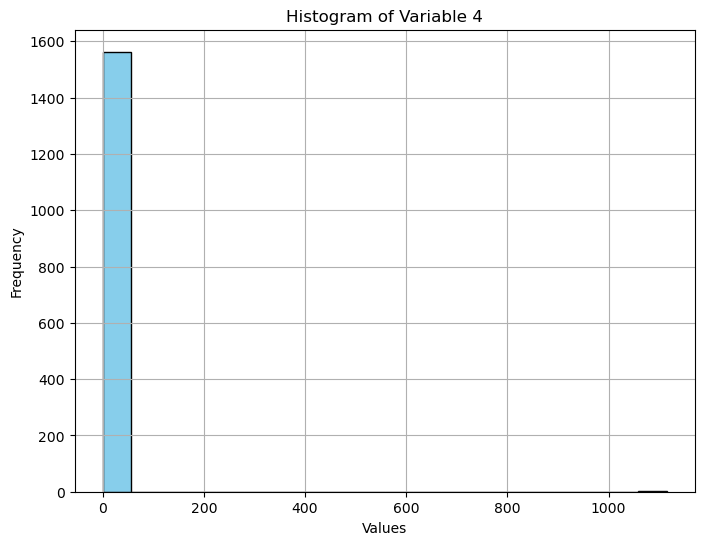

In [10]:
# 3.A-

import pandas as pd
import matplotlib.pyplot as plt

selected_variables = ['Time', '4', '9', '10', '24', '41', '59', '74', '75', '76', 'Pass/Fail']
selected_data = df[selected_variables]

variable_4_data = selected_data['4']

plt.figure(figsize=(8, 6))
plt.hist(variable_4_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Variable 4')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

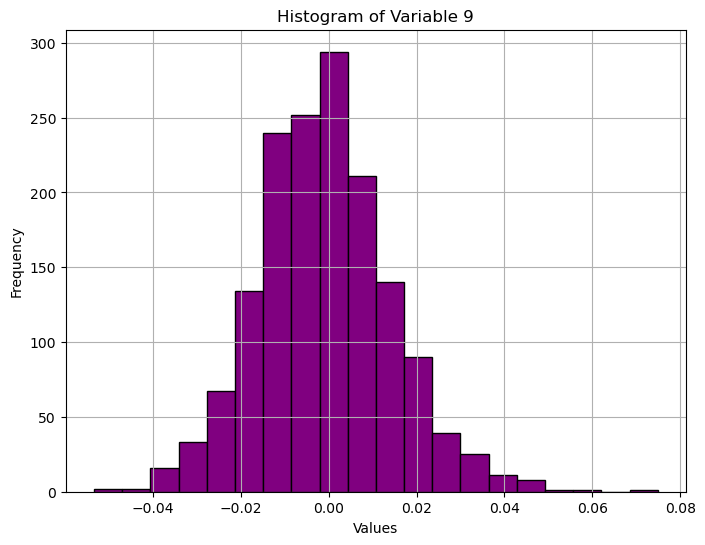

In [11]:
# 3.A-
variable_9_data = selected_data['9']
plt.figure(figsize=(8, 6))
plt.hist(variable_9_data, bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Variable 9')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

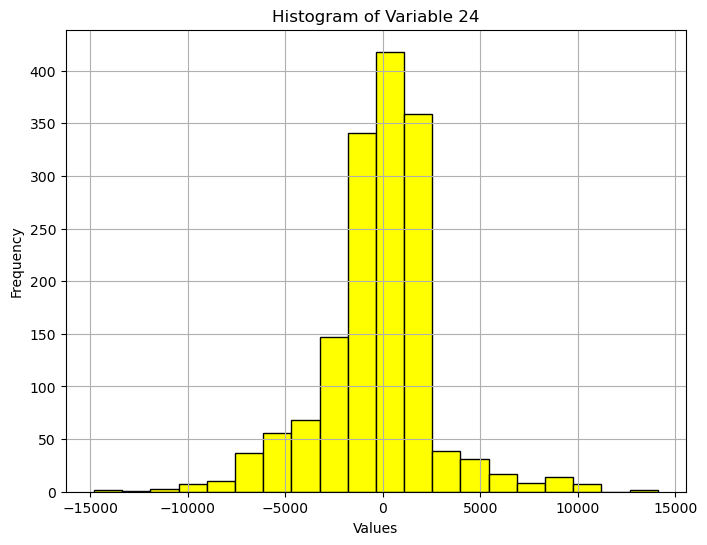

In [12]:
# 3.A-

variable_24_data = selected_data['24']
plt.figure(figsize=(8, 6))
plt.hist(variable_24_data, bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Variable 24')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

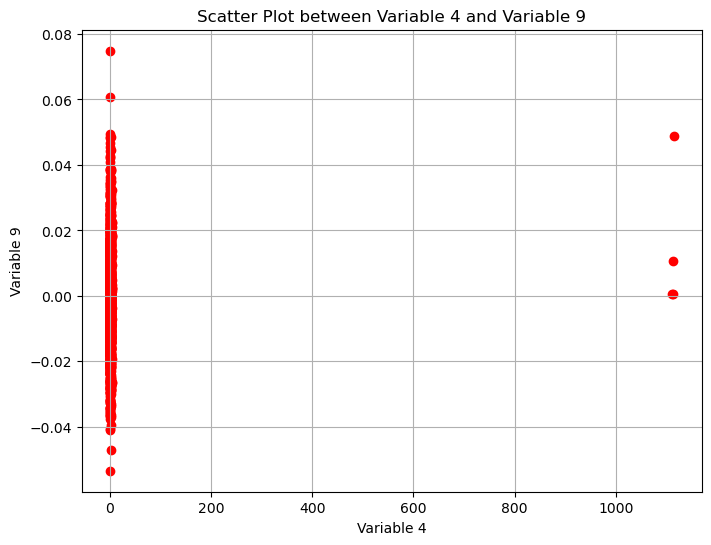

In [13]:
# 3.B-

plt.figure(figsize=(8, 6))
plt.scatter(selected_data['4'], selected_data['9'], color='red')
plt.title('Scatter Plot between Variable 4 and Variable 9')
plt.xlabel('Variable 4')
plt.ylabel('Variable 9')
plt.grid(True)
plt.show()

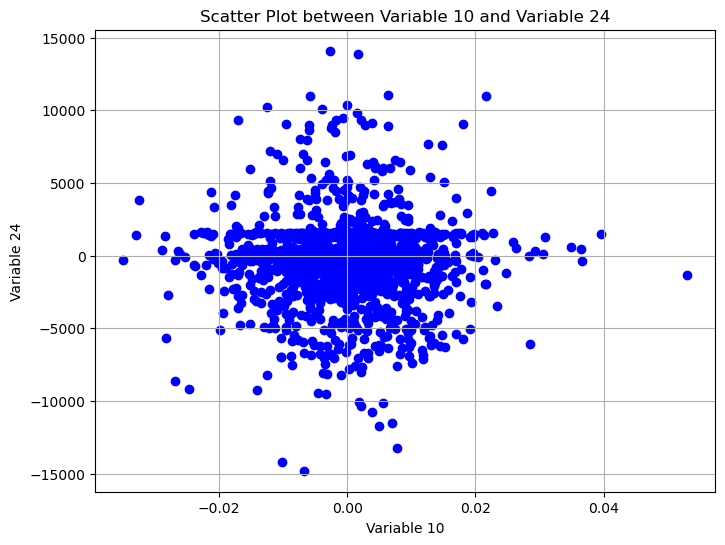

In [14]:
# 3.B-

plt.figure(figsize=(8, 6))
plt.scatter(selected_data['10'], selected_data['24'], color='blue')
plt.title('Scatter Plot between Variable 10 and Variable 24')
plt.xlabel('Variable 10')
plt.ylabel('Variable 24')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6156\1443249155.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


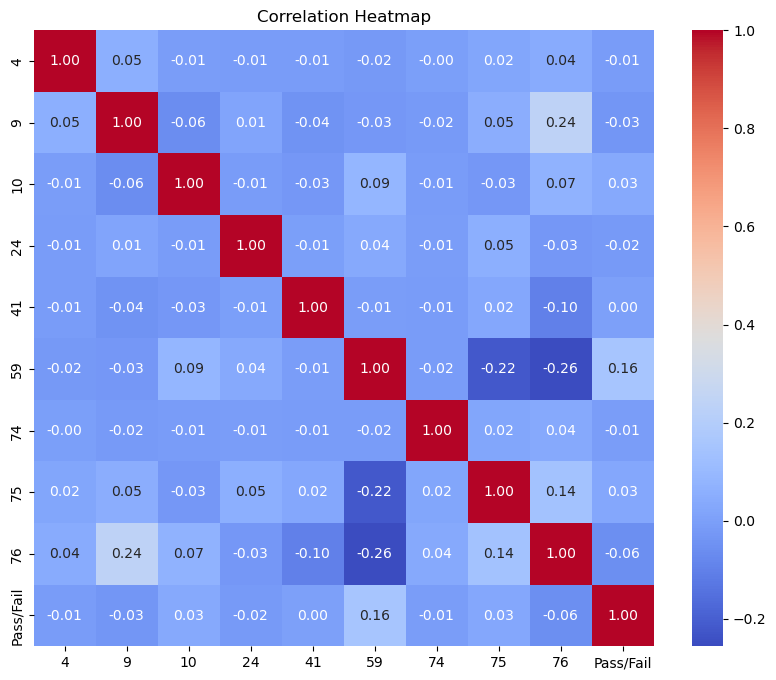

In [15]:
# 3.B-

import seaborn as sns

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# 4.A-

predictors = selected_data.drop(columns=['Pass/Fail'])
target = selected_data['Pass/Fail']

In [17]:
# 4.B-

target_distribution = target.value_counts()
print("Target Distribution:")
print(target_distribution)

Target Distribution:
-1    1463
 1     104
Name: Pass/Fail, dtype: int64


In [18]:
# 4.B-
from imblearn.over_sampling import SMOTE

numeric_predictors = predictors.select_dtypes(include=np.number)

smote = SMOTE(random_state=42)
predictors_balanced, target_balanced = smote.fit_resample(numeric_predictors, target)

target_balanced_distribution = target_balanced.value_counts()

print("Balanced Target Distribution:")
print(target_balanced.value_counts())


Balanced Target Distribution:
-1    1463
 1    1463
Name: Pass/Fail, dtype: int64


In [19]:
# 4.C-

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(predictors_balanced, target_balanced, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape (before standardization):", X_train.shape)
print("Testing set shape (before standardization):", X_test.shape)
print("Training set shape (after standardization):", X_train_scaled.shape)
print("Testing set shape (after standardization):", X_test_scaled.shape)

print("Sample data from training set (before standardization):\n", X_train.head())
print("Sample data from testing set (before standardization):\n", X_test.head())
print("Sample data from training set (after standardization):\n", X_train_scaled[:5])
print("Sample data from testing set (after standardization):\n", X_test_scaled[:5])

Training set shape (before standardization): (2340, 9)
Testing set shape (before standardization): (586, 9)
Training set shape (after standardization): (2340, 9)
Testing set shape (after standardization): (586, 9)
Sample data from training set (before standardization):
              4         9        10           24        41         59   74  \
2826  1.516348 -0.006149 -0.007792  -225.891379  3.113539   7.156494  0.0   
2591  1.408515  0.012001 -0.003597   146.894728  2.157565  17.926703  0.0   
2227  1.278977  0.018946  0.001836    63.346338  1.936136  17.222807  0.0   
2513  1.452817 -0.008634  0.007119 -1993.896142  4.057274   9.010819  0.0   
542   0.802400  0.008600 -0.006300  6579.500000  3.459000   0.166400  0.0   

            75        76  
2826 -0.040732 -0.054750  
2591 -0.028723 -0.072955  
2227 -0.058083 -0.118352  
2513 -0.026252 -0.037774  
542   0.005000 -0.033100  
Sample data from testing set (before standardization):
              4         9        10           24 

In [20]:
# 4.D-

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

train_summary = X_train_df.describe()
test_summary = X_test_df.describe()


print("5-point summary of training set (after standardization):")
print(train_summary)
print("\n5-point summary of testing set (after standardization):")
print(test_summary)

5-point summary of training set (after standardization):
                  4             9            10            24            41  \
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
mean   1.518254e-18  6.073015e-18  1.670079e-17 -2.277381e-17  4.630674e-17   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -5.208824e-02 -3.465389e+00 -3.851985e+00 -5.655916e+00 -1.743706e+00   
25%   -4.245485e-02 -6.372124e-01 -6.109642e-01 -4.196722e-01 -3.360477e-01   
50%   -3.652950e-02 -2.839566e-02  5.572383e-02  1.357404e-01 -1.288347e-01   
75%   -3.188624e-02  5.999534e-01  6.348326e-01  6.529343e-01  1.667653e-01   
max    2.794949e+01  4.718289e+00  6.055923e+00  5.675992e+00  1.747081e+01   

                 59            74            75            76  
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  
mean  -3.719722e-17 -1.518254e-18  2.429206e-17  1.510662e-16  
std    1.000214e+00  1.000214e+00  1.00

In [21]:
# 4.D-

# OBSERVATION =

# Count: Both training and testing sets have consistent counts, indicating no missing values.
# Mean: Means are close to zero after standardization, with slight variations between sets for some features.
# Standard Deviation (std): Standard deviations are approximately 1 in both sets, indicating similar spread of data points.
# Minimum and Maximum: Similar ranges for minimum and maximum values in both sets, with some outliers, especially in maximum values.

In [22]:
# 5.A-

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# 5.B-

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, ShuffleSplit

kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cv_scores_kf = cross_val_score(clf, X_train_scaled, y_train, cv=kf, scoring='accuracy')
cv_scores_skf = cross_val_score(clf, X_train_scaled, y_train, cv=skf, scoring='accuracy')
cv_scores_ss = cross_val_score(clf, X_train_scaled, y_train, cv=ss, scoring='accuracy')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Test set accuracy: 0.8071672354948806


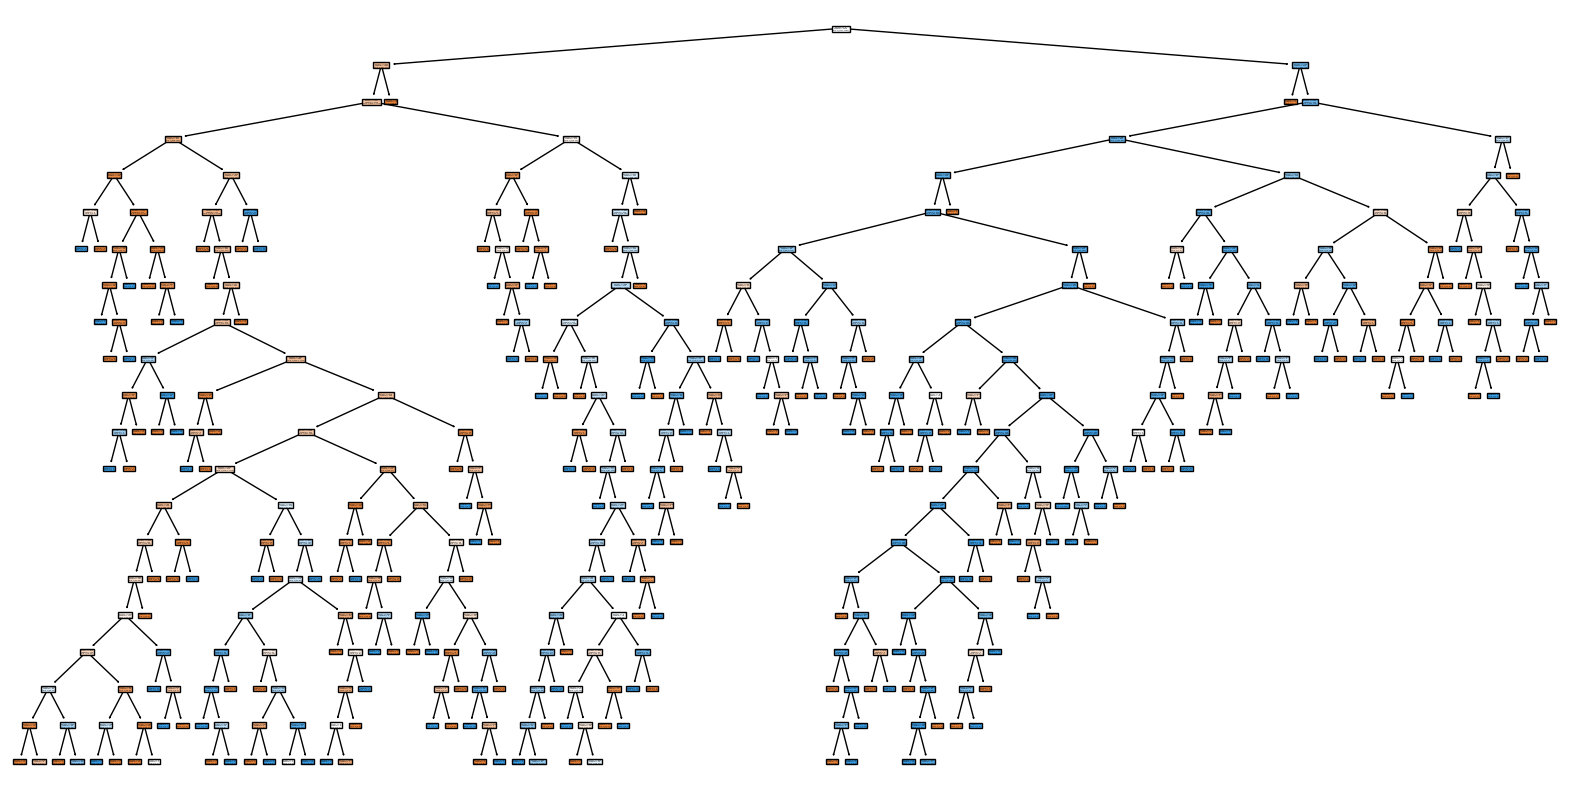

In [24]:
# 5.C-

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]  
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

best_clf = grid_search.best_estimator_

test_score = best_clf.score(X_test_scaled, y_test)
print("Test set accuracy:", test_score)

plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X_train.columns)
plt.show()


In [25]:
# 5.D-

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

best_params = grid_search.best_params_

best_clf_pca = DecisionTreeClassifier(**best_params)
best_clf_pca.fit(X_train_pca, y_train)

test_score_pca = best_clf_pca.score(X_test_pca, y_test)
print("Test set accuracy with PCA:", test_score_pca)


Test set accuracy with PCA: 0.7713310580204779


In [26]:
# 5.D-

from sklearn.pipeline import Pipeline

pca = PCA()
pipe = Pipeline([('pca', pca), ('clf', DecisionTreeClassifier())])

param_grid_pipe = {
    'pca__n_components': [0.95, 0.99],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search_pipe = GridSearchCV(pipe, param_grid_pipe, cv=5, scoring='accuracy', verbose=1)
grid_search_pipe.fit(X_train_scaled, y_train)
best_params_pipe = grid_search_pipe.best_params_
test_score_pipe = grid_search_pipe.score(X_test_scaled, y_test)
print("Best parameters with PCA and DecisionTree:", best_params_pipe)
print("Test set accuracy with PCA and DecisionTree:", test_score_pipe)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters with PCA and DecisionTree: {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'pca__n_components': 0.95}
Test set accuracy with PCA and DecisionTree: 0.7849829351535836


In [27]:
# 5.E-

from sklearn.metrics import classification_report

y_pred = grid_search_pipe.predict(X_test_scaled)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.74      0.78       306
           1       0.75      0.83      0.79       280

    accuracy                           0.78       586
   macro avg       0.79      0.79      0.78       586
weighted avg       0.79      0.78      0.78       586



In [28]:
# 5.E- 

# Precision: or the "-1" class (pass), the precision is 0.83, indicating that out of all the instances predicted as pass, 
# 83% were correct. Similarly, for  the "1" class (fail), the precision is 0.75, indicating that out of all the instances 
# predicted as fail, 75% were correct.

# Recall: Recall measures the ability of the model to correctly identify the instances of each class. For the "-1" class 
# (pass), the recall is 0.75, indicating that the model correctly identified 75% of all actual pass instances. For the 
# "1" class (fail), the recall is 0.84, indicating that the model correctly identified 84% of all actual fail instances.

# F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For 
# both classes, the F1-score is approximately 0.79, indicating good overall performance in terms of both precision and recall.

# Accuracy: Overall accuracy of the model is 0.79, indicating that approximately 79% of the predictions made by the model are correct.


In [29]:
# 5.F-

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    "Support Vector Machine": (SVC(), {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Naive Bayes": (GaussianNB(), {'var_smoothing': [1e-9]}),
}

results = {}
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_

    train_accuracy = accuracy_score(y_train, best_model.predict(X_train_scaled))

    test_accuracy = accuracy_score(y_test, best_model.predict(X_test_scaled))

    results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

for name, scores in results.items():
    print(f"{name}: Train Accuracy = {scores['Train Accuracy']:.4f}, Test Accuracy = {scores['Test Accuracy']:.4f}")



Training Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training Random Forest...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training Support Vector Machine...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training K-Nearest Neighbors...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Logistic Regression: Train Accuracy = 0.7077, Test Accuracy = 0.6365
Random Forest: Train Accuracy = 1.0000, Test Accuracy = 0.8805
Support Vector Machine: Train Accuracy = 0.9910, Test Accuracy = 0.9027
K-Nearest Neighbors: Train Accuracy = 0.9094, Test Accuracy = 0.8225
Naive Bayes: Train Accuracy = 0.5209, Test Accuracy = 0.4795


In [30]:
# 6.A-

# Logistic Regression: Train Accuracy = 0.7077, Test Accuracy = 0.6365
# Random Forest: Train Accuracy = 1.0000, Test Accuracy = 0.8788
# Support Vector Machine: Train Accuracy = 0.9910, Test Accuracy = 0.9027
# K-Nearest Neighbors: Train Accuracy = 0.9094, Test Accuracy = 0.8225
# Naive Bayes: Train Accuracy = 0.5209, Test Accuracy = 0.4795

In [31]:
# 6.B-

# High Test Accuracy: SVM achieves the highest test accuracy of 0.9027 among all models, indicating that it generalizes well to unseen data.
# High Train Accuracy: SVM also has a high train accuracy of 0.9910, suggesting that it captures the underlying patterns in the training data effectively without overfitting.
# Robustness to Overfitting: The SVM model demonstrates robustness to overfitting with a minimal gap between train and test accuracies compared to other models like Logistic Regression.

# Given these factors, we select the Support Vector Machine model as the final best trained model. 

In [32]:
# 6.C-

import pickle

with open('SVC.pkl', 'wb') as f:
    pickle.dump(SVC, f)

print("SVM model has been saved as 'svm_model.pkl'")

SVM model has been saved as 'svm_model.pkl'


In [33]:
# 6.D-

# The Support Vector Machine (SVM) model exhibited the highest test accuracy of 0.9027 among all models tested.
# SVM also demonstrated a high training accuracy of 0.9910, indicating strong performance on both training and test datasets.
# Following closely, the Random Forest model achieved a test accuracy of 0.8788, with a perfect training accuracy of 1.0000.
# Both SVM and Random Forest models demonstrated strong performance and generalization capabilities on the dataset.